## **PROBLEM STATEMENT**
1. To Prepare a complete data analysis report on the given data.

2. To Explore football skills and **cluster** football players based on their attributes.

3. To Explore the data and attempt all the below asked questions in a step by step manner:
- Prepare a rank ordered list of top 10 countries with most players. Which countries are producing the most footballers that play at this level.
- Plot the distribution of overall rating vs. age of players. Interpret what is the age after which a player stops improving.
- Which type of offensive players tends to get paid the most: the striker, the right-winger, or the left-winger?.

## **BUSINESS CASE**

This case aims at exploring the football skills and **clustering** football players based on their attributes.
The dataset provided includes the players data for the Career Mode from **FIFA 15 to FIFA 20**. The data allows multiple comparisons of the same players across the **last 6 versions of the videogame**.

Exploring the FIFA data can be done by: Historical comparisons between players, Ideal budget to create a competitive team and at which point the budget does not allow to buy significantly better players for the 11-men lineup. An extra is the same comparison with the Potential attribute for the lineup instead of the Overall attribute, in addition, Sample analysis of top n% players to see if some important attributes such as Agility or BallControl or Strength have been popular or not across the FIFA versions. The trend (year on year ) of attributes is also an important indication of how some attributes are necessary for players to win games (a version with more top 5% players with high BallControl stats would indicate that the game is more focused on the technique rather than the physical aspect). Since this case is aims at **clustering** football players based on their attributes we will be using **K-Means** to evaluate the data.

## DOMAIN ANALYSIS
- The dataset consists of players data for the Career Mode from FIFA 15 to FIFA 20. The data allows multiple comparisons of the same players across the last 6 versions of the videogame. 
- It consists of 100+ attributes including:
  
  a. Personal data of the player like name, age, nationality, club, salary, etc.
  
  b. Players positions, preferred foot, etc.
  
  c. Players skills like shooting, passing, defending, dribbling, etc. All the skills are rated on the scale of 1-99.

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

## Importing Dataset

In [2]:
data=pd.read_csv('players_20.csv')

# Basic Checks

In [3]:
pd.set_option('display.max_columns', None)
data.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,5,4,4,Medium/Low,Messi,Yes,195800000.0,"#Dribbler, #Distance Shooter, #Crosser, #FK Sp...",RW,10.0,NaN,2004-07-01,2021.0,NaN,NaN,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,93,93,58500000,405000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,96500000.0,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,7.0,NaN,2018-07-10,2022.0,LS,7.0,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,"Long Throw-in, Selfish, Argues with Officials,...",84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,"LW, CAM",Right,5,5,5,High/Medium,Neymar,Yes,195200000.0,"#Speedster, #Dribbler, #Playmaker , #Crosser,...",CAM,10.0,NaN,2017-08-03,2022.0,LW,10.0,91.0,85.0,87.0,95.0,32.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Injury Free, Selfish, Early C...",87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,90+3,90+3,89+3,82+3,82+3,82+3,89+3,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,GK,Right,3,3,1,Medium/Medium,Normal,Yes,164700000.0,NaN,GK,13.0,NaN,2014-07-16,2023.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,89.0,52.0,90.0,"Flair, Acrobatic Clearance",13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,91,91,90000000,470000,"LW, CF",Right,4,4,4,High/Medium,Normal,Yes,184500000.0,"#Speedster, #Dribbler, #Acrobat",LW,7.0,NaN,2019-07-01,

In [4]:
data.tail()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
18273,245006,https://sofifa.com/player/245006/shuai-shao/20...,Shao Shuai,邵帅,22,1997-03-10,186,79,China PR,Beijing Renhe FC,48,56,40000,2000,CB,Right,1,3,2,Medium/High,Normal,No,70000.0,NaN,RES,36.0,NaN,2018-07-13,2019.0,NaN,NaN,57.0,23.0,28.0,33.0,47.0,51.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21,17,40,35,27,24,23,21,28,35,56,58,45,40,73,36,70,60,47,16,46,48,28,25,39,41,45,50,52,5,5,13,5,14,32+2,32+2,32+2,31+2,31+2,31+2,31+2,31+2,31+2,31+2,31+2,33+2,33+2,33+2,33+2,33+2,43+2,42+2,42+2,42+2,43+2,45+2,46+2,46+2,46+2,45+2
18274,250995,https://sofifa.com/player/250995/mingjie-xiao/...,Xiao Mingjie,Mingjie Xiao,22,1997-01-01,177,66,China PR,Shanghai SIPG FC,48,56,40000,2000,CB,Right,1,2,2,Medium/Medium,Normal,No,72000.0,NaN,SUB,31.0,NaN,2019-02-01,2022.0,NaN,NaN,58.0,24.0,33.0,35.0,48.0,48.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24,20,42,43,28,32,24,29,39,31,55,61,43,41,76,33,72,55,44,20,42,49,23,25,37,35,42,53,57,13,6,14,11,9,33+2,33+2,33+2,33+2,32+2,32+2,32+2,33+2,33+2,33+2,33+2,35+2,36+2,36+2,36+2,35+2,44+2,43+2,43+2,43+2,44+2,46+2,47+2,47+2,47+2,46+2
18275,252332,https://sofifa.com/player/252332/wei-zhang/20/...,Zhang Wei,张威,19,2000-05-16,186,75,China PR,Hebei China Fortune FC,48,56,40000,1000,CM,Right,1,2,2,Low/Medium,Lean,No,70000.0,NaN,SUB,38.0,NaN,2019-01-01,2019.0,NaN,NaN,54.0,35.0,44.0,45.0,48.0,51.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32,33,49,53,32,40,32,32,55,49,55,54,52,52,57,48,60,50,51,26,50,45,38,38,36,39,46,52,46,7,8,10,6,14,43+2,43+2,43+2,43+2,43+2,43+2,43+2,43+2,44+2,44+2,44+2,45+2,46+2,46+2,46+2,45+2,47+2,49+2,49+2,49+2,47+2,47+2,49+2,49+2,49+2,47+2
18276,251110,https://sofifa.com/player/251110/haijian-wang/...,Wang Haijian,汪海健,18,2000-08-02,185,74,China PR,Shanghai Greenland Shenhua FC,48,54,40000,1000,CM,Right,1,2,2,Low/Low,Lean,No,70000.0,NaN,SUB,33.0,NaN,2019-02-01,2022.0,NaN,NaN,59.0,35.0,47.0,47.0,45.0,52.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39,34,47,54,28,42,37,39,48,49,55,63,55,54,59,46,61,42,55,28,57,49,31,48,36,40,39,44,54,14,9,13,13,13,43+2,43+2,43+2,45+2,44+2,44+2,44+2,45+2,46+2,46+2,46+2,46+2,46+2,46+2,46+2,46+2,48+2,48+2,48+2,48+2,48+2,48+2,49+2,49+2,49+2,48+2
18277,233449,https://sofifa.com/player/233449/ximing-pan/20...,Pan Ximing,潘喜明,26,1993-01-11,182,78,China PR,Hebei China Fortune FC,48,51,40000,2000,CM,Right,1,3,2,Medium/Medium,Normal,No,NaN,NaN,SUB,37.0,Tianjin TEDA FC,NaN,2019.0,NaN,NaN,60.0,32.0,51.0,45.0,47.0,55.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44,30,48,58,25,40,34,35,52,46,54,64,52,49,71,41,64,40,61,30,54,47,29,52,38,42,52,42,48,8,12,14,9,10,42+2,42+2,42+2,44+2,43+2,43+2,43+2,44+2,46+2,46+2,46+2,46+2,46+2,46+2,46+2,46+2,48+2,49+2,49+2,49+2,48+2,48+2,50+2,50+2,50+2,48+2


In [5]:
data.dtypes

sofifa_id      int64
player_url    object
short_name    object
long_name     object
age            int64
               ...  
lb            object
lcb           object
cb            object
rcb           object
rb            object
Length: 104, dtype: object

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Columns: 104 entries, sofifa_id to rb
dtypes: float64(16), int64(45), object(43)
memory usage: 14.5+ MB


In [7]:
data.describe()

,sofifa_id,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,skill_moves,release_clause_eur,team_jersey_number,contract_valid_until,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
count,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,1.827800e+04,18278.000000,18278.000000,18278.000000,18278.000000,1.698000e+04,18038.000000,18038.000000,1126.000000,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000,2036.000000,2036.000000,2036.000000,2036.000000,2036.000000,2036.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000
mean,219738.864482,25.283291,181.362184,75.276343,66.244994,71.546887,2.484038e+06,9456.942773,1.103184,2.944250,2.368038,4.740717e+06,20.103892,2021.114591,12.114565,67.700899,52.298301,57.233777,62.531585,51.553503,64.876678,65.422397,63.146365,61.832515,66.390472,37.798625,63.374754,49.718405,45.590218,52.221468,58.748003,42.809388,55.596509,47.325692,42.708885,52.768848,58.461976,64.299923,64.415746,63.504924,61.752544,63.856439,58.181694,64.928165,62.889485,65.234763,46.812945,55.742149,46.380239,50.072163,53.609749,48.383357,58.528778,46.848889,47.640333,45.606631,16.572765,16.354853,16.212934,16.368038,16.709924
std,27960.200461,4.656964,6.756961,7.047744,6.949953,6.139669,5.585481e+06,21351.714095,0.378861,0.664656,0.765038,1.103002e+07,16.603639,1.289888,6.735922,11.297656,14.029418,10.407844,10.284950,16.419528,9.760162,7.736278,7.244023,7.510709,8.154062,10.634038,8.447876,18.325403,19.594609,17.428429,14.679653,17.701815,18.929118,18.422991,17.433612,15.246454,16.741878,15.042232,14.847763,14.808380,9.135613,14.201559,13.326083,11.934059,16.017954,12.534811,19.322343,17.318157,20.775812,19.594022,13.955626,15.708099,11.880840,20.091287,21.585641,21.217734,17.738069,16.996925,16.613665,17.136497,18.038125
min,768.000000,16.000000,156.000000,50.000000,48.000000,49.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,1.300000e+04,1.000000,2019.000000,1.000000,24.000000,15.000000,24.000000,23.000000,15.000000,27.000000,44.000000,42.000000,35.000000,45.000000,12.000000,41.000000,5.000000,2.000000,5.000000,7.000000,3.000000,4.000000,6.000000,4.000000,8.000000,5.000000,12.000000,11.000000,11.000000,21.000000,12.000000,14.000000,19.000000,12.000000,20.000000,4.000000,9.000000,3.000000,2.000000,9.000000,7.000000,12.000000,1.000000,5.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,204445.500000,22.000000,177.000000,70.000000,62.000000,67.000000,3.250000e+05,1000.000000,1.000000,3.000000,2.000000,5.630000e+05,9.000000,2020.000000,6.000000,61.000000,42.000000,50.000000,57.000000,36.000000,59.000000,60.000000,58.000000,57.000000,60.750000,29.000000,58.000000,38.000000,30.000000,44.000000,54.000000,30.000000,50.000000,34.000000,31.000000,43.000000,54.000000,56.000000,57.

# Exploratory Data Analysis

## Task 1 - Prepare a complete data analysis report on the given data

### Extracting column names based on datatype for quicker analysis

In [8]:
all_col = list(data.columns)
data[all_col].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Columns: 104 entries, sofifa_id to rb
dtypes: float64(16), int64(45), object(43)
memory usage: 14.5+ MB


- There are 18278 entries in the dataset. 
- Total 104 columns are there out of which 16 columns are float, 45 are int and 43 are of type object

In [9]:
flt_col = list(data.select_dtypes('float').columns)
data[flt_col].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   release_clause_eur    16980 non-null  float64
 1   team_jersey_number    18038 non-null  float64
 2   contract_valid_until  18038 non-null  float64
 3   nation_jersey_number  1126 non-null   float64
 4   pace                  16242 non-null  float64
 5   shooting              16242 non-null  float64
 6   passing               16242 non-null  float64
 7   dribbling             16242 non-null  float64
 8   defending             16242 non-null  float64
 9   physic                16242 non-null  float64
 10  gk_diving             2036 non-null   float64
 11  gk_handling           2036 non-null   float64
 12  gk_kicking            2036 non-null   float64
 13  gk_reflexes           2036 non-null   float64
 14  gk_speed              2036 non-null   float64
 15  gk_positioning     

In [10]:
int_col = list(data.select_dtypes('int').columns)
data[int_col].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Data columns (total 45 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   sofifa_id                   18278 non-null  int64
 1   age                         18278 non-null  int64
 2   height_cm                   18278 non-null  int64
 3   weight_kg                   18278 non-null  int64
 4   overall                     18278 non-null  int64
 5   potential                   18278 non-null  int64
 6   value_eur                   18278 non-null  int64
 7   wage_eur                    18278 non-null  int64
 8   international_reputation    18278 non-null  int64
 9   weak_foot                   18278 non-null  int64
 10  skill_moves                 18278 non-null  int64
 11  attacking_crossing          18278 non-null  int64
 12  attacking_finishing         18278 non-null  int64
 13  attacking_heading_accuracy  18278 non-null  int64
 14  attack

In [11]:
obj_col = list(data.select_dtypes('object').columns)
data[obj_col].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Data columns (total 43 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   player_url        18278 non-null  object
 1   short_name        18278 non-null  object
 2   long_name         18278 non-null  object
 3   dob               18278 non-null  object
 4   nationality       18278 non-null  object
 5   club              18278 non-null  object
 6   player_positions  18278 non-null  object
 7   preferred_foot    18278 non-null  object
 8   work_rate         18278 non-null  object
 9   body_type         18278 non-null  object
 10  real_face         18278 non-null  object
 11  player_tags       1499 non-null   object
 12  team_position     18038 non-null  object
 13  loaned_from       1048 non-null   object
 14  joined            16990 non-null  object
 15  nation_position   1126 non-null   object
 16  player_traits     7566 non-null   object
 17  ls          

**Observation:**
- All 16 features of float datatype have null values present in them.
- There are 45 features of int datatype. None of the 45 features have null values.
- Out of 43 features of Object datatype 33 datatypes have null values.
- All the null values will be dealth with in data preprocessing step.

In [12]:
# Remove special character from data
data = data.replace('[\#]','',regex=True)
data.head(10)

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,5,4,4,Medium/Low,Messi,Yes,195800000.0,"Dribbler, Distance Shooter, Crosser, FK Specia...",RW,10.0,NaN,2004-07-01,2021.0,NaN,NaN,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,93,93,58500000,405000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,96500000.0,"Speedster, Dribbler, Distance Shooter, Acrobat...",LW,7.0,NaN,2018-07-10,2022.0,LS,7.0,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,"Long Throw-in, Selfish, Argues with Officials,...",84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,"LW, CAM",Right,5,5,5,High/Medium,Neymar,Yes,195200000.0,"Speedster, Dribbler, Playmaker , Crosser, FK ...",CAM,10.0,NaN,2017-08-03,2022.0,LW,10.0,91.0,85.0,87.0,95.0,32.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Injury Free, Selfish, Early C...",87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,90+3,90+3,89+3,82+3,82+3,82+3,89+3,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,GK,Right,3,3,1,Medium/Medium,Normal,Yes,164700000.0,NaN,GK,13.0,NaN,2014-07-16,2023.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,89.0,52.0,90.0,"Flair, Acrobatic Clearance",13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,91,91,90000000,470000,"LW, CF",Right,4,4,4,High/Medium,Normal,Yes,184500000.0,"Speedster, Dribbler, Acrobat",LW,7.0,NaN,2019-07-01,202

In [13]:
data.duplicated().sum()

0

- Duplicate values are not there in the dataset.

## Univariate Analysis

In [14]:
!pip install sweetviz

In [15]:
import sweetviz as sv
fifa_report = sv.analyze(data)
fifa_report.show_html('Fifa_20.html')  # Report will be generated with the name 'Fifa_20.html'.

                                             |                                             | [  0%]   00:00 ->…

Report Fifa_20.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


#### OBSERVATIONS SUMMARY:

##### 1. **AGE:**
   - Player ages range from 16 to 42, with an average age of 25.3.

##### 2. **HEIGHT CM:**
   - Average player height is 181.4cm, ranging from 156cm to 205cm.

##### 3. **WEIGHT KG:**
   - Player weights vary from 50kg to 110kg.

##### 4. **OVERALL:**
   - Overall stats range from 48.0 to 94, with an average of 66.2.

##### 5. **POTENTIAL:**
   - Player potential ranges from 49.0 to 95.0.

##### 6. **VALUE EUR:**
   - Average player value is 2.5 million, with a maximum of 105.5 million.

##### 7. **WAGE EUR:**
   - Player wages range from 9k to a maximum of 565k, averaging at 9k.

##### 8. **PREFERRED FOOT:**
   - 75% of players prefer their right foot, while 25% prefer their left foot.

##### 9. **INTERNATIONAL REPUTATION:**
   - Ratings range from 1 to 5, with 92% having a rating of 1.

##### 10. **WEAK FOOT:**
   - Most players have a weak foot rating of 3.

##### 11. **SKILL MOVES:**
   - Skill moves range from 1 to 5, with 2 being the most common (36%).

##### 12. **WORK RATE:**
   - Medium work rate is the most common (54%).

##### 13. **BODY TYPE:**
   - 59% of players have a normal body type, while 36% have a lean body type.

##### 14. **REAL FACE:**
   - 89% of player faces are not real.

##### 15. **RELEASE CLAUSE EUR:**
   - The average release clause is 4.7 million, with a maximum of 165.8 million.

##### 16. **PLAYER TAGS:**
   - Strength, acrobat, engine, and speedster are the most common player tags.

##### 17. **TEAM POSITION & NATION POSITION:**
   - "SUB" is the most common team position, and contracts are valid until 2020 for most players.

##### 18. **TEAM JERSEY NUMBER:**
   - Ranges from 1 to 99, with the majority between 1 to 40.

##### 19. **CONTRACT VALID UNTIL:**
   - Most contracts are valid until 2020, with a range from 2019 to 2026.

##### 20. **NATION JERSEY NUMBER:**
   - Ranges from 1 to 30, with the majority between 1 to 20.

##### 21. **PACE:**
   - The majority of players' pace falls between 60 to 80.

##### 22. **SHOOTING:**
   - Shooting scores range from 15 to 93, clustering around 25 to 70.

##### 23. **PASSING:**
   - Passing scores range from 24 to 92, averaging at 57.2.

##### 24. **DRIBBLING:**
   - Most dribbling scores fall between 50 to 80.

##### 25. **DEFENDING:**
   - Defending scores range from 15 to 90, with a common range of 50 to 70.

##### 26. **PHYSIC:**
   - Physic scores range from 27.0 to 90.0, with a common range of 60 to 80.

##### 27. **GK DIVING:**
   - Goalkeeper diving scores range from 44 to 90, with most falling between 60 to 70.

##### 28. **GK HANDLING:**
   - Goalkeeper handling scores range from 42 to 92, with most between 60 to 70.

##### 29. **GK KICKING:**
   - Goalkeeper kicking scores range from 35.0 to 93.0, averaging at 61.8.

##### 30. **GK REFLEX:**
   - Most goalkeeper reflex scores fall between 60 to 70.

##### 31. **GK SPEED:**
   - The highest goalkeeper speed is 65.0, with most between 25 to 50.

##### 32. **GK POSITIONING:**
   - Goalkeeper positioning scores range from 41 to 91, with the most common at 65.

##### 33. **ATTACKING CROSSING:**
   - Attacking crossing scores range from 5 to 93, with common scores between 50 to 70.

##### 34. **ATTACKING FINISHING:**
   - Attacking finishing scores vary, with a common score of 60.

##### 35. **ATTACKING HEADING ACCURACY:**
   - Heading accuracy scores range from 5 to 93, with most between 50 to 60.

##### 36. **ATTACKING SHORT PASSING:**
   - Most attacking short passing scores fall between 60 to 70.

##### 37. **ATTACKING VOLLEYS:**
   - Attacking volleys scores range from 30 to 70, averaging at 42.8.

##### 38. **SKILL DRIBBLING:**
   - Skill dribbling scores vary, with a common score of 65.

##### 39. **SKILL CURVE:**
   - Skill curve scores range from 6 to 94, with most between 40 to 70.

##### 40. **SKILL FK ACCURACY:**
   - Skill free-kick accuracy scores range from 4 to 94, averaging at 42.7.

##### 41. **SKILL LONG PASSING:**
   - Skill long passing scores range from 8 to 92, with most between 50 to 60.

##### 42. **SKILL BALL CONTROL:**
   - Skill ball control scores range from 5 to 96, averaging at 58.5.

##### 43. **MOVEMENT ACCELERATION:**
   - Movement acceleration scores range from 12 to 97, with most between 60 to 80.

##### 44. **MOVEMENT SPRINT SPEED:**
   - Movement sprint speed scores range from 11 to 96, averaging at 64.4.

##### 45. **MOVEMENT AGILITY:**
   - Movement agility scores range from 11 to 96, averaging at 63.5.

##### 46. **MOVEMENT REACTION:**
   - Movement reaction scores range from 21 to 96, averaging at 61.8.

##### 47. **MOVEMENT BALANCE:**
   - Movement balance scores range from 12 to 97, averaging at 64.9.

##### 48. **POWER SHOT POWER:**
   - Shot power scores range from 14 to 95, averaging at 58.2.

##### 49. **POWER JUMPING:**
   - Jumping scores range from 19 to 95, averaging at 64.9.

##### 50. **POWER STAMINA:**
   - Stamina scores range from 12 to 97, averaging at 62.9.

##### 51. **POWER STRENGTH:**
   - Strength scores range from 20 to 97, averaging at 65.2.

##### 52. **POWER LONG SHOT:**
   - Long shot scores range from 4 to 94, averaging at 46.8.

##### 53. **MENTALITY AGGRESSION:**
   - Aggression scores range from 9 to 95, averaging at 55.7.

##### 54. **MENTALITY INTERCEPTIONS:**
   - Interceptions scores range from 3 to 93, averaging at 46.3.

##### 55. **MENTALITY POSITIONING:**
   - Positioning scores range from 2 to 95, averaging at 50.1.

##### 56. **MENTALITY VISION:**
   - Vision scores range from 9 to 94, averaging at 53.6.

##### 57. **MENTALITY PENALTIES:**
   - Penalties scores range from 7 to 92, averaging at 48.7.

##### 58. **MENTALITY COMPOSURE:**
   - Composure scores range from 12 to 96, averaging at 58.5.

##### 59. **DEFENDING MARKING:**
   - Marking scores range from 1 to 94, averaging at 46.8.

##### 60. **DEFENDING STANDING TACKLE:**
   - Standing tackle scores range from 5 to 92, averaging at 47.6.

##### 61. **DEFENDING SLIDING TACKLE:**
   - Sliding tackle scores range from 3 to 90, averaging at 45.6.

##### 62. **GOALKEEPING DIVING:**
   - Goalkeeper diving scores range from 1 to 90, averaging at 16.6.

##### 63. **GOALKEEPING HANDLING:**
   - Goalkeeper handling scores range from 1 to 92, averaging at 16.4.

##### 64. **GOALKEEPING KICKING:**
   - Goalkeeper kicking scores range from 1 to 93, averaging at 16.2.

##### 65. **GOALKEEPING POSITIONING:**
   - Goalkeeper positioning scores range from 1 to 91, averaging at 16.4.

##### 66. **GOALKEEPING REFLEX:**
   - Goalkeeper reflex scores range from 1 to 92, averaging at 16.7.

##### 67. **PLAYER POSITIONS:**
   - Player positions are LS, ST, RS, LW, LF, CF, LF, RW, LAM, CAM, RAM, LM, LCM, CM, RCM, RM, LWB, LDM, CDM, RDM, RWB, LB, LCB, CB, RCB, RB
   - All player position scores are similar, with most falling within the range of 56 to 63.

## Bivariate Analysis and Multivariate Analysis

### Numerical Variable Analysis

### Age Vs Movement Reactions

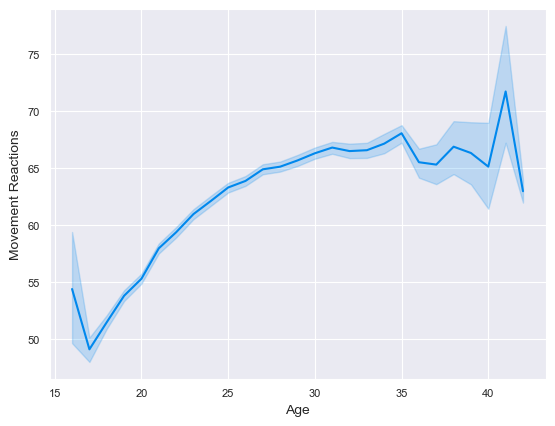

In [16]:
# Lineplot of Age vs. Movement Reactions
# plt.figure(figsize=(7,5))
sns.set_style('darkgrid')
sns.lineplot(x='age',y='movement_reactions',data=data)
plt.xlabel('Age')
plt.ylabel('Movement Reactions')
plt.show()

##### Observations: 
- Between the age 20 to 40, Movement Reactions are increasing with age.
- Movement reactions decreases with the increasing age.

### Height Vs Weight

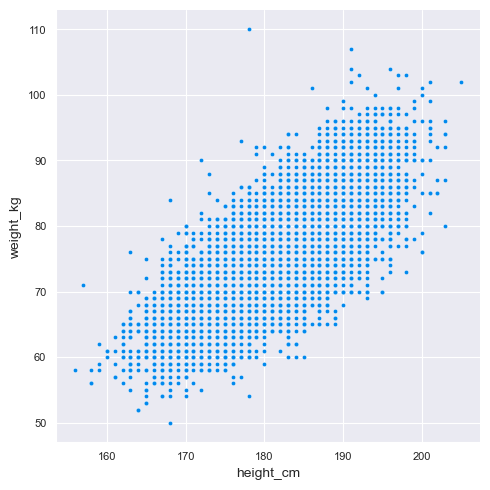

In [17]:
sns.set_style('darkgrid')
sns.relplot(x='height_cm',y='weight_kg',data=data)
plt.show()

##### Observation:
- For most of the players, as the height increases weight of the player also increases.

### Overall Rating Vs Potential Rating

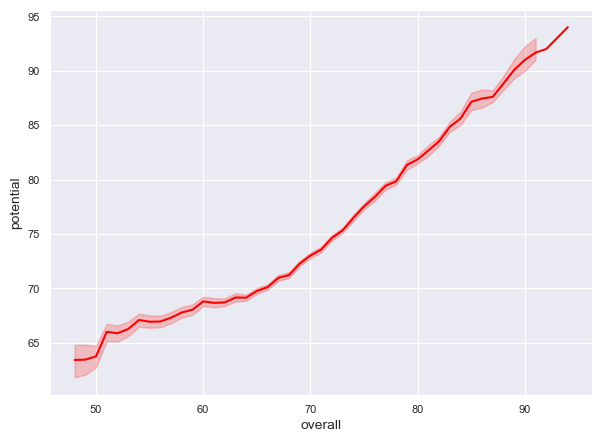

In [18]:
plt.figure(figsize=(7,5))
sns.lineplot(x='overall',y='potential',data=data,color='Red')
plt.show()

##### Observations:
- Players overall rating and potential rating are directly proportional.

### Overall Rating Vs Potential Rating w.r.t. Preffered Foot

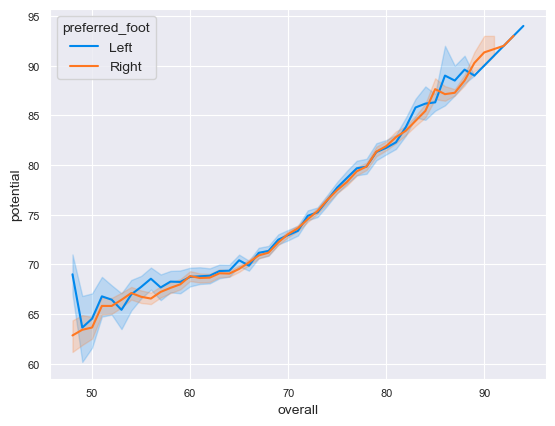

In [19]:
sns.lineplot(x='overall',y='potential',data=data,color='brown',hue='preferred_foot')
plt.show()

##### OBSERVATION:
* If the players overall rating is increasing the potential rating is increasing for both foot.`

### Value Eur Vs Wage Euro w.r.t Preferred Foot

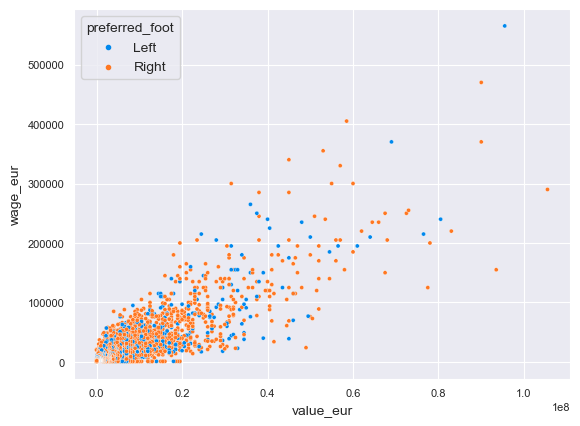

In [20]:
sns.scatterplot(x='value_eur',y='wage_eur',data=data,color='brown',hue='preferred_foot')
plt.show()

##### Observations:
- For the players with less value eur, Wage is also less.
- As the value of the player slightly increses, eage also increase.

### Pace Vs Shooting

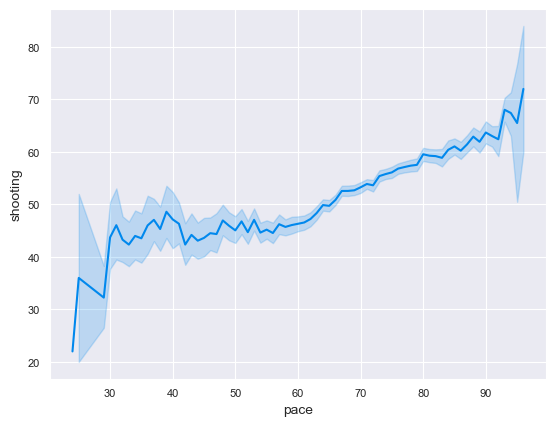

In [21]:
sns.lineplot(x='pace',y='shooting',data=data)
plt.show()

##### Observations:
- Shooting rate increase as the pace of the player increases.

### Pace Vs Passing 

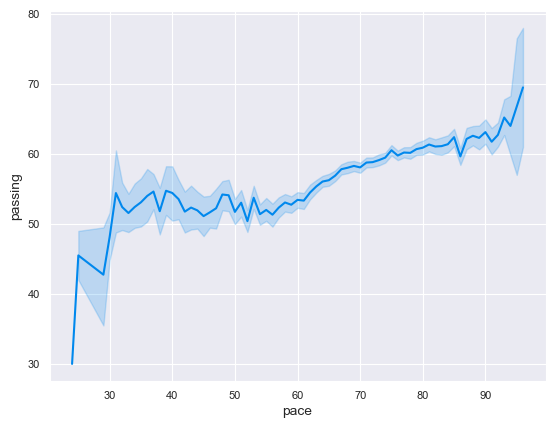

In [22]:
sns.lineplot(x='pace',y='passing',data=data)
plt.show()

##### Observations: 
- As the pace increases, passing skill of the player also increases.

### Pace Vs Dribbling

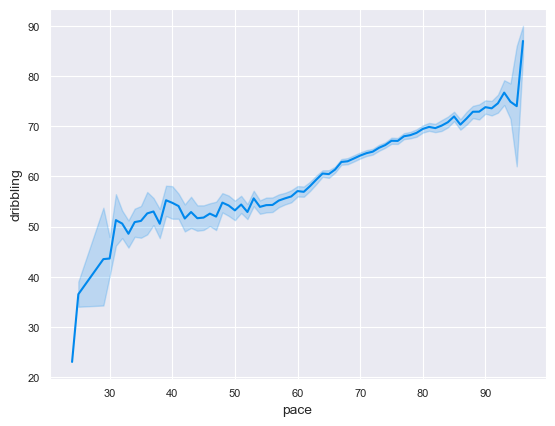

In [23]:
sns.lineplot(x='pace',y='dribbling',data=data)
plt.show()

##### Observations:
- As the pace increases, dribbling skill of the player also improves.
- If the pace is less than 30 or more than 95, dribbling skills of the player changes very drastically.

### Pace Vs Defending

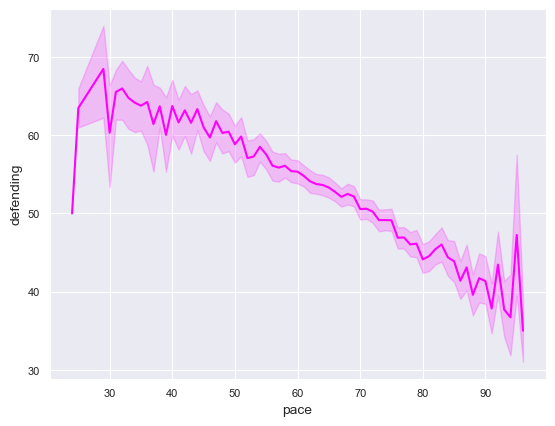

In [24]:
sns.set_style('darkgrid')
sns.lineplot(x=data['pace'],y=data['defending'],color='magenta')
plt.show()

##### Observations:
- As the pace increases, defending skill of players decreases.

### Shooting Vs Passing

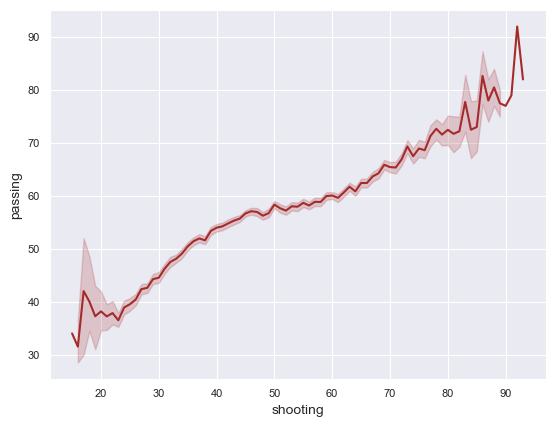

In [25]:
sns.lineplot(x=data['shooting'],y=data['passing'],color='brown')
plt.show()

##### Observations:
- Shooting skill and passing skill of player complements each other.
- Good shooting skill suggests that the player also has good passing skills.

### Dribbling Vs Defending

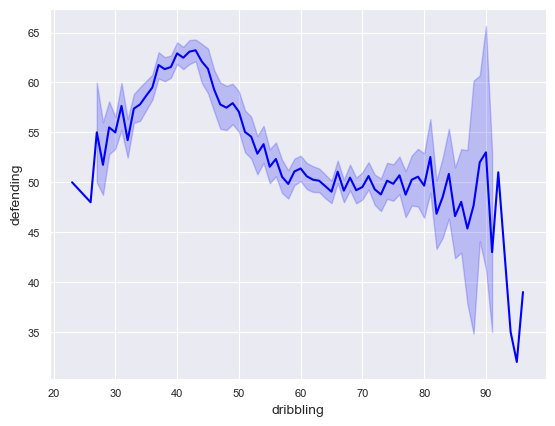

In [26]:
sns.lineplot(x=data['dribbling'],y=data['defending'],color='blue')
plt.show()

##### Observations:
- Till dribbling skill reaches 40, defending skill of player increases.
- After 40, as the dribbiling skill improves defending skills of the player are getting reduced.

### Goalkeeping  Diving Vs Goalkeeping  Handling

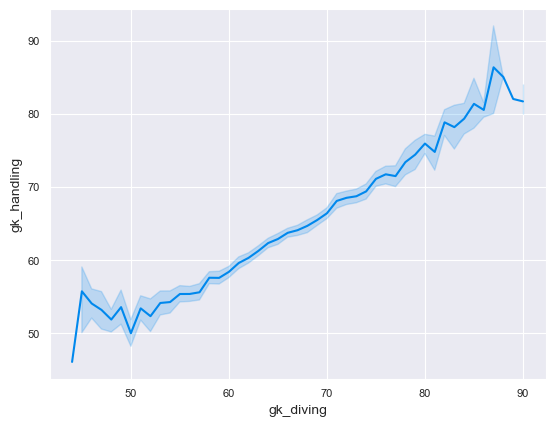

In [27]:
sns.lineplot(x='gk_diving',y='gk_handling',data=data)
plt.show()

##### Observations:
- as the gk diving skills increases, gk handling skills also increases.

### Goalkeeping Kicking Vs Goalkeeping Reflexes

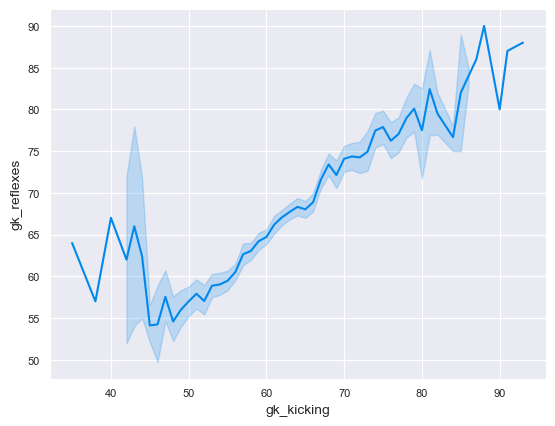

In [28]:
sns.lineplot(x='gk_kicking',y='gk_reflexes',data=data)
plt.show()

##### Observations:
- From gk kicking range 45 to 80, gk reflexes increases.

### Goalkeeping Positioning Vs Goalkeeping Speed

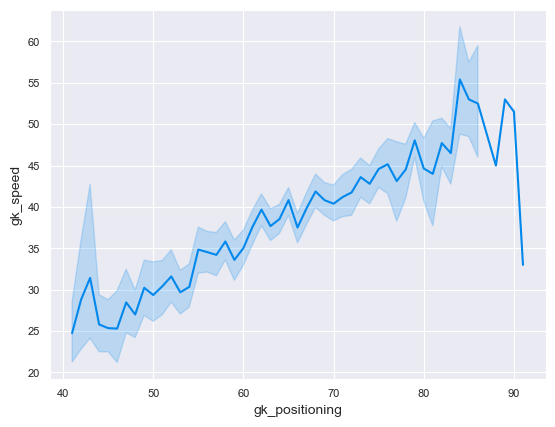

In [29]:
sns.lineplot(x='gk_positioning',y='gk_speed',data=data)
plt.show()

##### Observations:
- As the gk positioning increases till 90, gk speed also increases.
- After 90, gk speed suddenly decreases as gk positioning increases.

### Attacking Finishing Vs Attacking Heading Accuracy

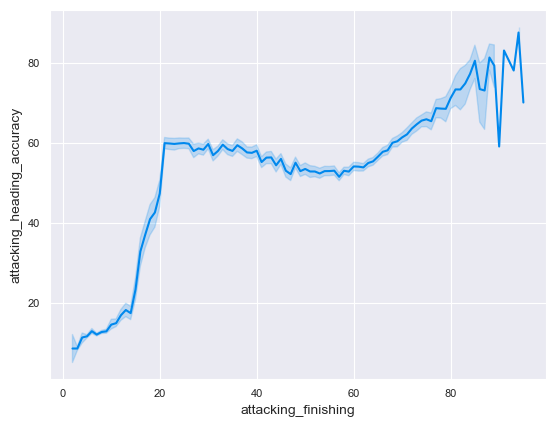

In [30]:
sns.lineplot(x='attacking_finishing',y='attacking_heading_accuracy',data=data)
plt.show()

##### Observations:
- Heading accuracy increases as attacking finishing increases.

### Attacking Heading Accuracy Vs Attacking Short Passing w.r.t Preferred Foot

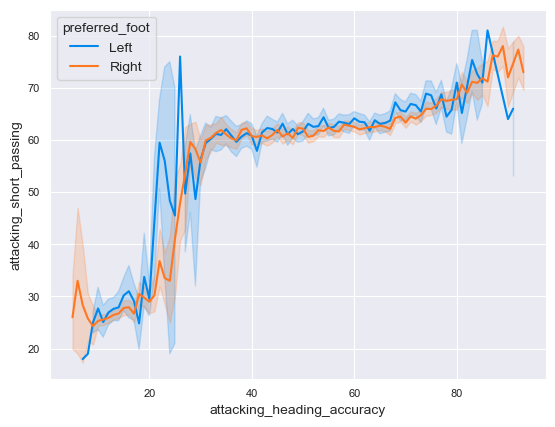

In [31]:
sns.lineplot(x='attacking_heading_accuracy',y='attacking_short_passing',data=data,color='gold',hue='preferred_foot')
plt.show()

##### Observations:
- For both left and right leg, short passing skill increases as heading accuracy increases.

### Skill Dribbling Vs Skill Ball Control

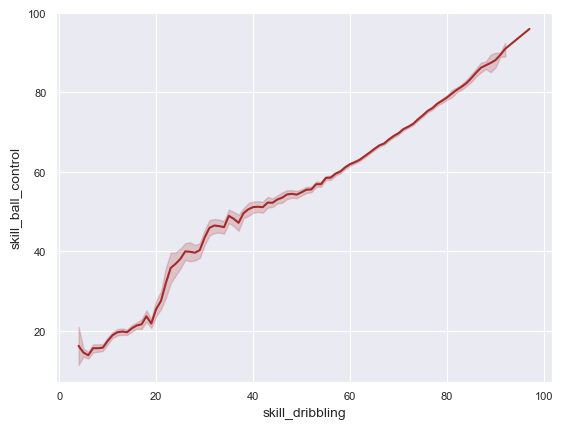

In [32]:
sns.lineplot(x='skill_dribbling',y='skill_ball_control',data=data,color='brown')
plt.show()

##### Observations:
- Both the skills follow direct proportion. If one skill increases other increases too.

### Skill Long Passing Vs Power Long Shots

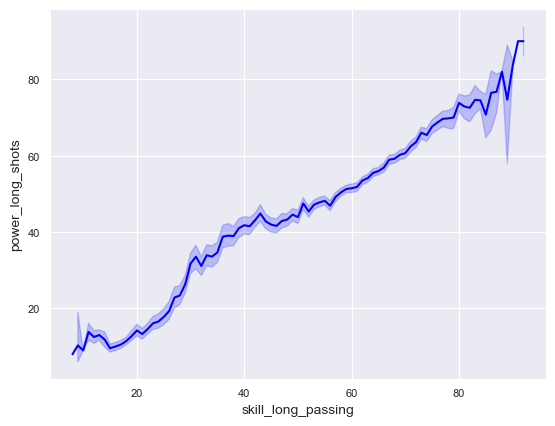

In [33]:
sns.lineplot(x='skill_long_passing',y='power_long_shots',data=data,color='blue')
plt.show()

##### Observations:
- More skills of long passing then the increase of power long shots.

### Movement Sprint Speed Vs Movement Reaction

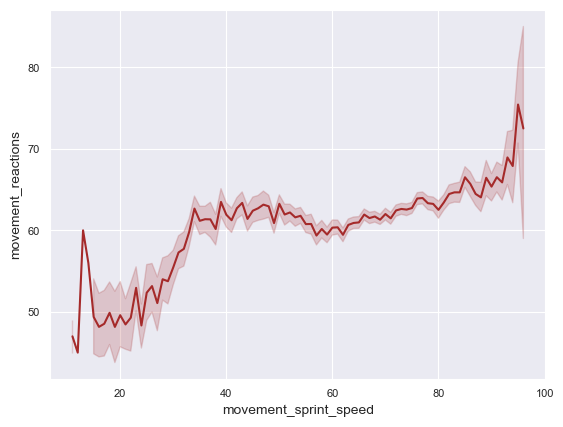

In [34]:
sns.lineplot(x='movement_sprint_speed',y='movement_reactions',data=data,color='brown')
plt.show()

##### Observations:
- Movement sprint range around 40 to 100 then the movement reaction is constant otherwise fall in both

### Power Shot Vs Power Stamina

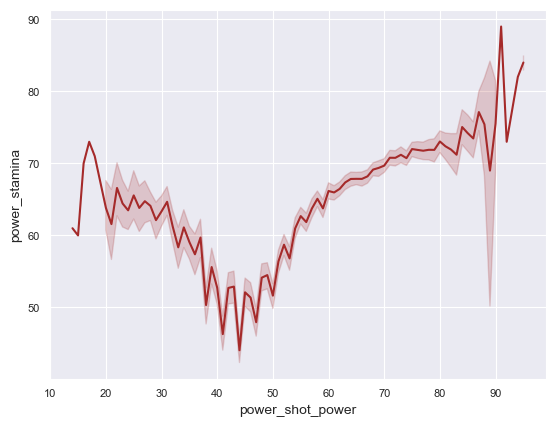

In [35]:
sns.lineplot(x='power_shot_power',y='power_stamina',data=data,color='brown')
plt.show()

##### Observations:
- If the power shot range around 30 to 60 then the power stamina is decreases
- If the player has more shot power then the stamina is more.

### Power Jumping Vs Power Strength

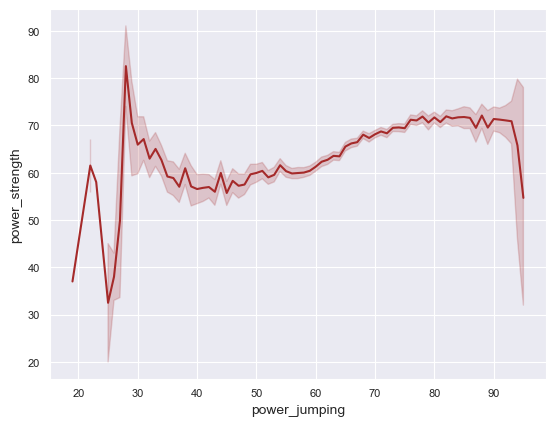

In [36]:
sns.lineplot(x='power_jumping',y='power_strength',data=data,color='brown')
plt.show()

##### Observations:
- If the power jumping is 30 then the power strength is more and below 30 power jumping less power strength.
- Power jumping above 30 then the power strength is constant

### Mentality Aggression Vs Mentality Positioning

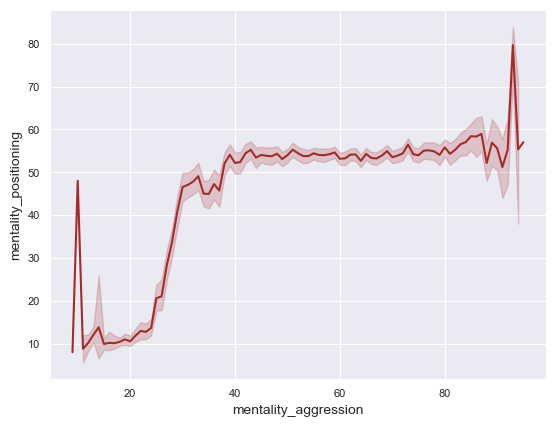

In [37]:
sns.lineplot(x='mentality_aggression',y='mentality_positioning',data=data,color='brown')
plt.show()

##### Observations:
- If the mentality aggression around 10 to 30 then the mentality positioning is low
- Below 10 mentality aggression the score of mentality positioning is slightly high. otherwise both metality positioning score is constant.

### Mentality Penalties Vs Mentality Vision

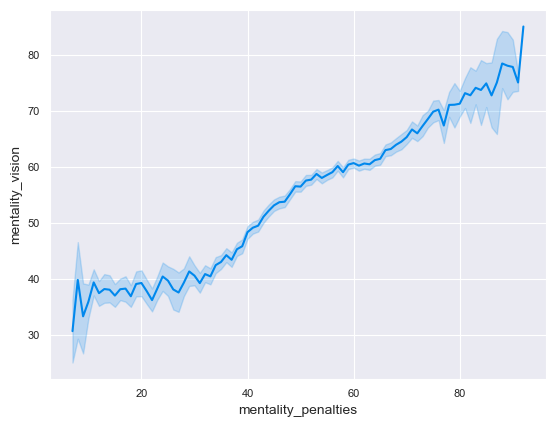

In [38]:
sns.lineplot(x='mentality_penalties',y='mentality_vision',data=data)
plt.show()

##### Observations:
- If the penalties is increases then the mentality vision also increases.

### Defending Standing Tackle Vs Defending Sliding Tackle w.r.t. Preferred Foot

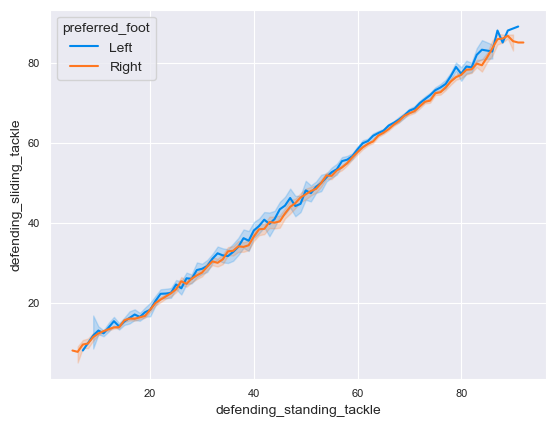

In [39]:
sns.lineplot(x='defending_standing_tackle',y='defending_sliding_tackle',data=data,hue='preferred_foot')
plt.show()

##### Observations:
- If defending standing tackle is increases then the defending sliding tackle also increases with both foot.

## Categorical Variables Analysis

### International Reputation Vs Weak Foot

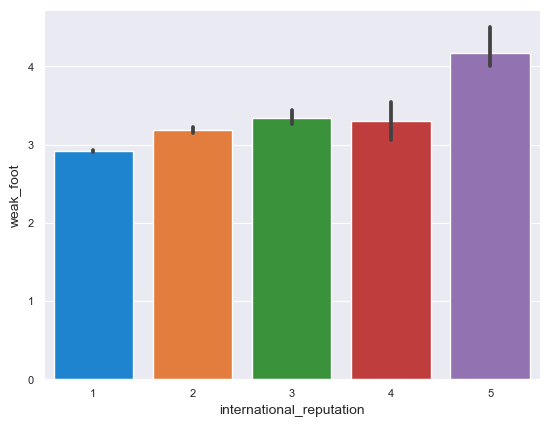

In [40]:
sns.barplot(x='international_reputation',y='weak_foot',data=data)
plt.show()

##### Observations:
- 5 Intrenational reputation rating of player has more than 4 week foot
- 1 international reputation rating player has less than 3 weak foot
- 2, 3, 4 international reputation player has constant weak foot

### Preferred Foot Vs Pace

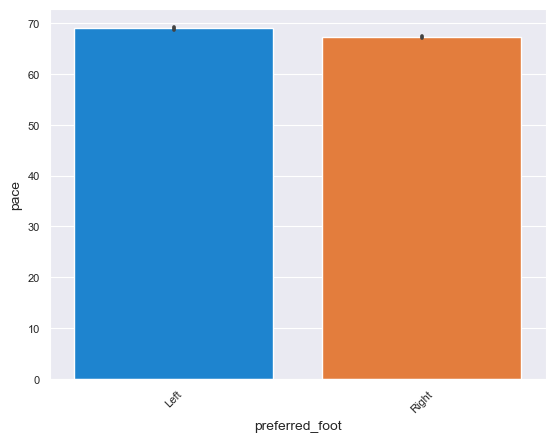

In [41]:
sns.barplot(x='preferred_foot',y='pace',data=data)
plt.xticks(rotation=45)
plt.show()

##### Observations:
- both left and right preferred foot player pace is same.

### Team Position Vs Shooting

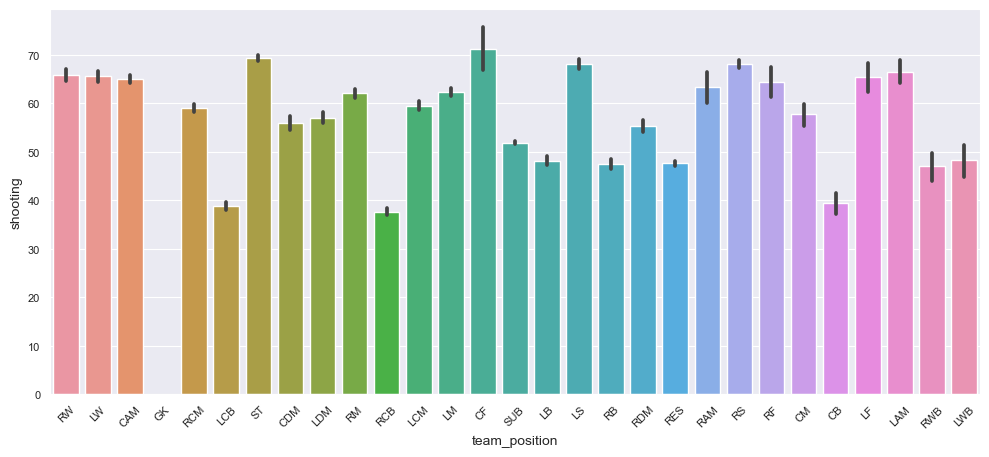

In [42]:
plt.figure(figsize=(12,5))
sns.barplot(x='team_position',y='shooting',data=data)
plt.xticks(rotation=45)
plt.show()

##### Observations:
- In this plot we clearly seent that GK team position has no shooting score.
- CF team position has maximum shooting score.

### 10 Ages With The Maximum Number of Players

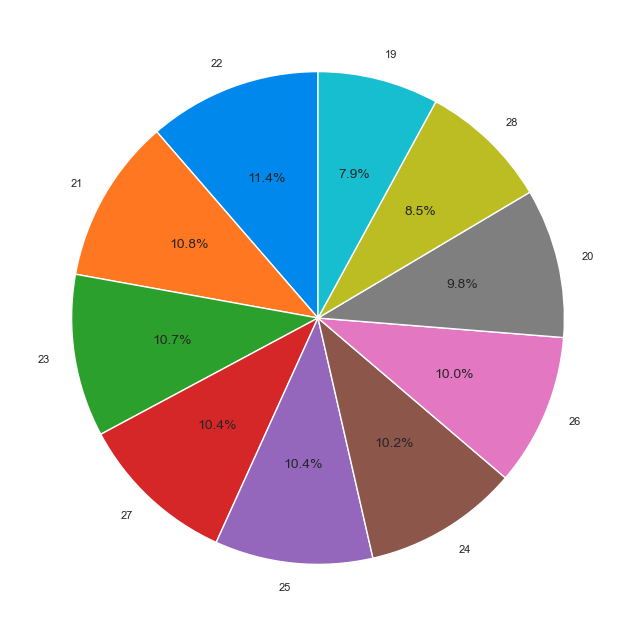

In [43]:
# Top 10 ages
top_age_counts = data['age'].value_counts().nlargest(10)

# Create a pie chart 
plt.figure(figsize=(8,8))
plt.pie(top_age_counts,labels=top_age_counts.index,autopct='%1.1f%%',startangle=90)
plt.show()

##### Observations:
- We have more number of players in the age(decreasing order) given below:
  
  22, 21, 23, 27, 25, 24, 26, 20, 28, 19

## Multivariate Analysis

### Multivariate analysis of Players Attributes

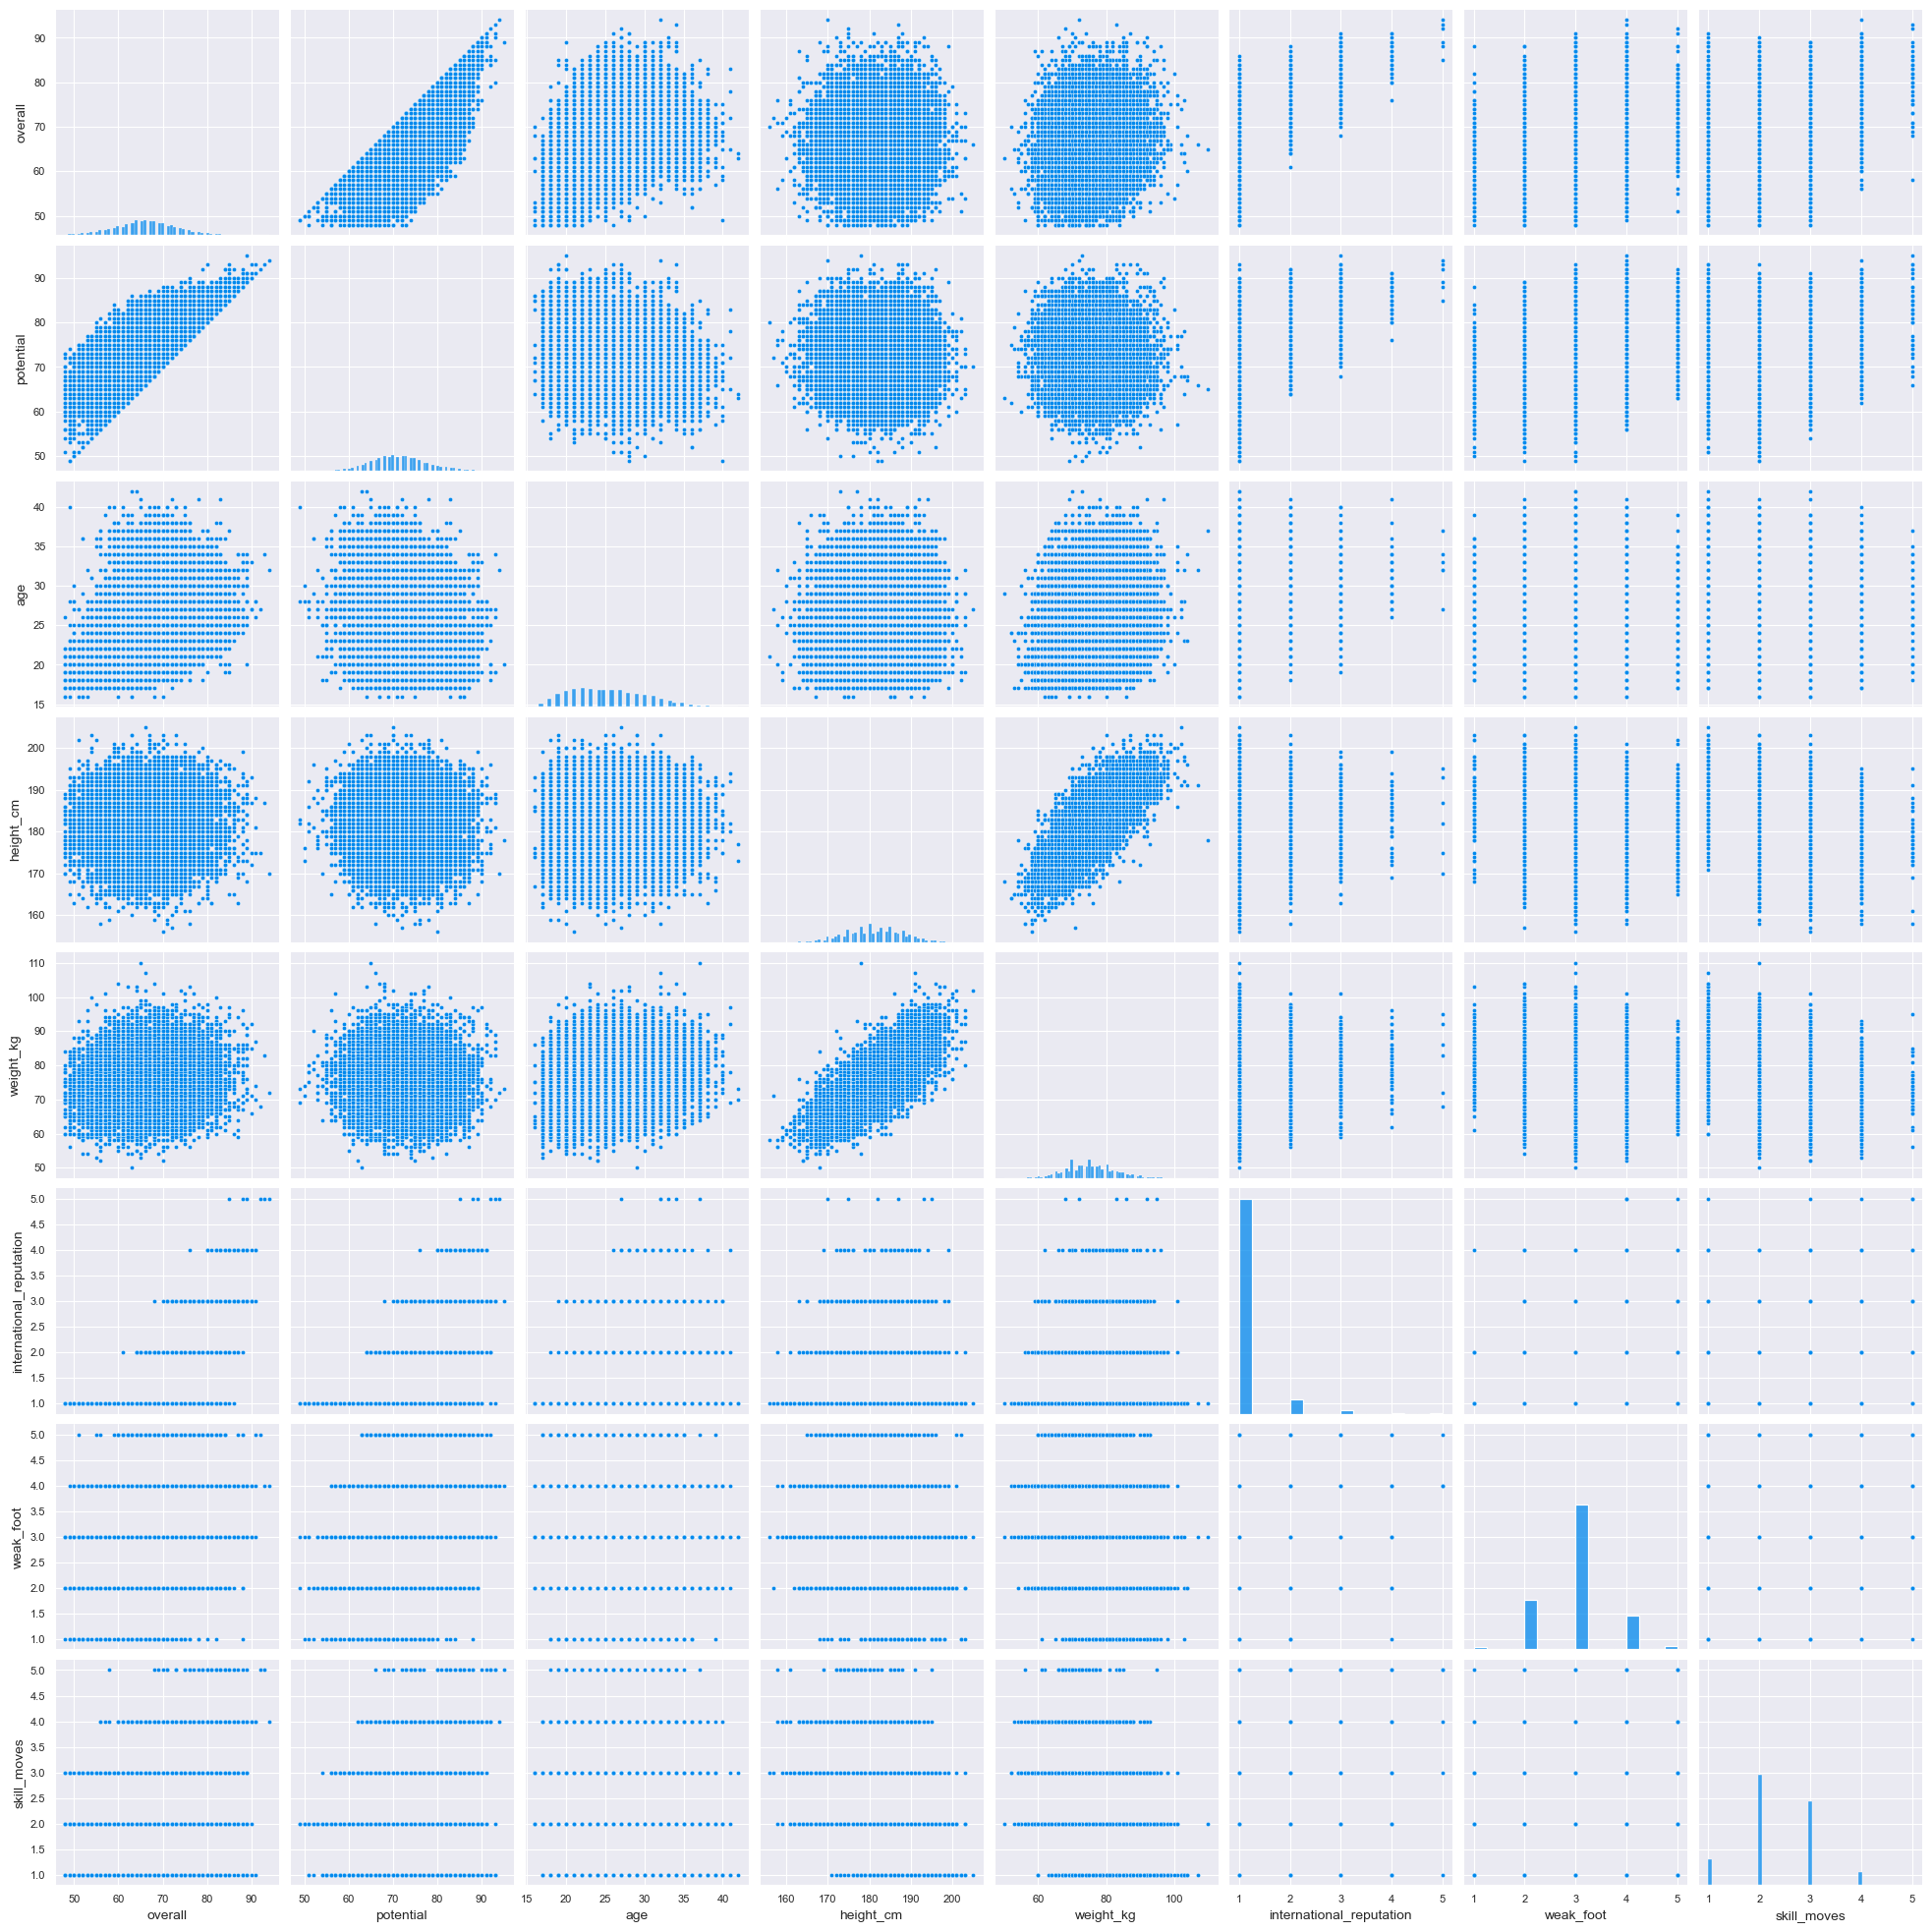

In [44]:
player_attributes = ['overall','potential','age','height_cm','weight_kg','international_reputation','preferred_foot','weak_foot'
                     ,'skill_moves','work_rate','body_type']
sns.pairplot(data[player_attributes])
plt.show()

### Multivariate Analysis of Goalkeeper Attributes

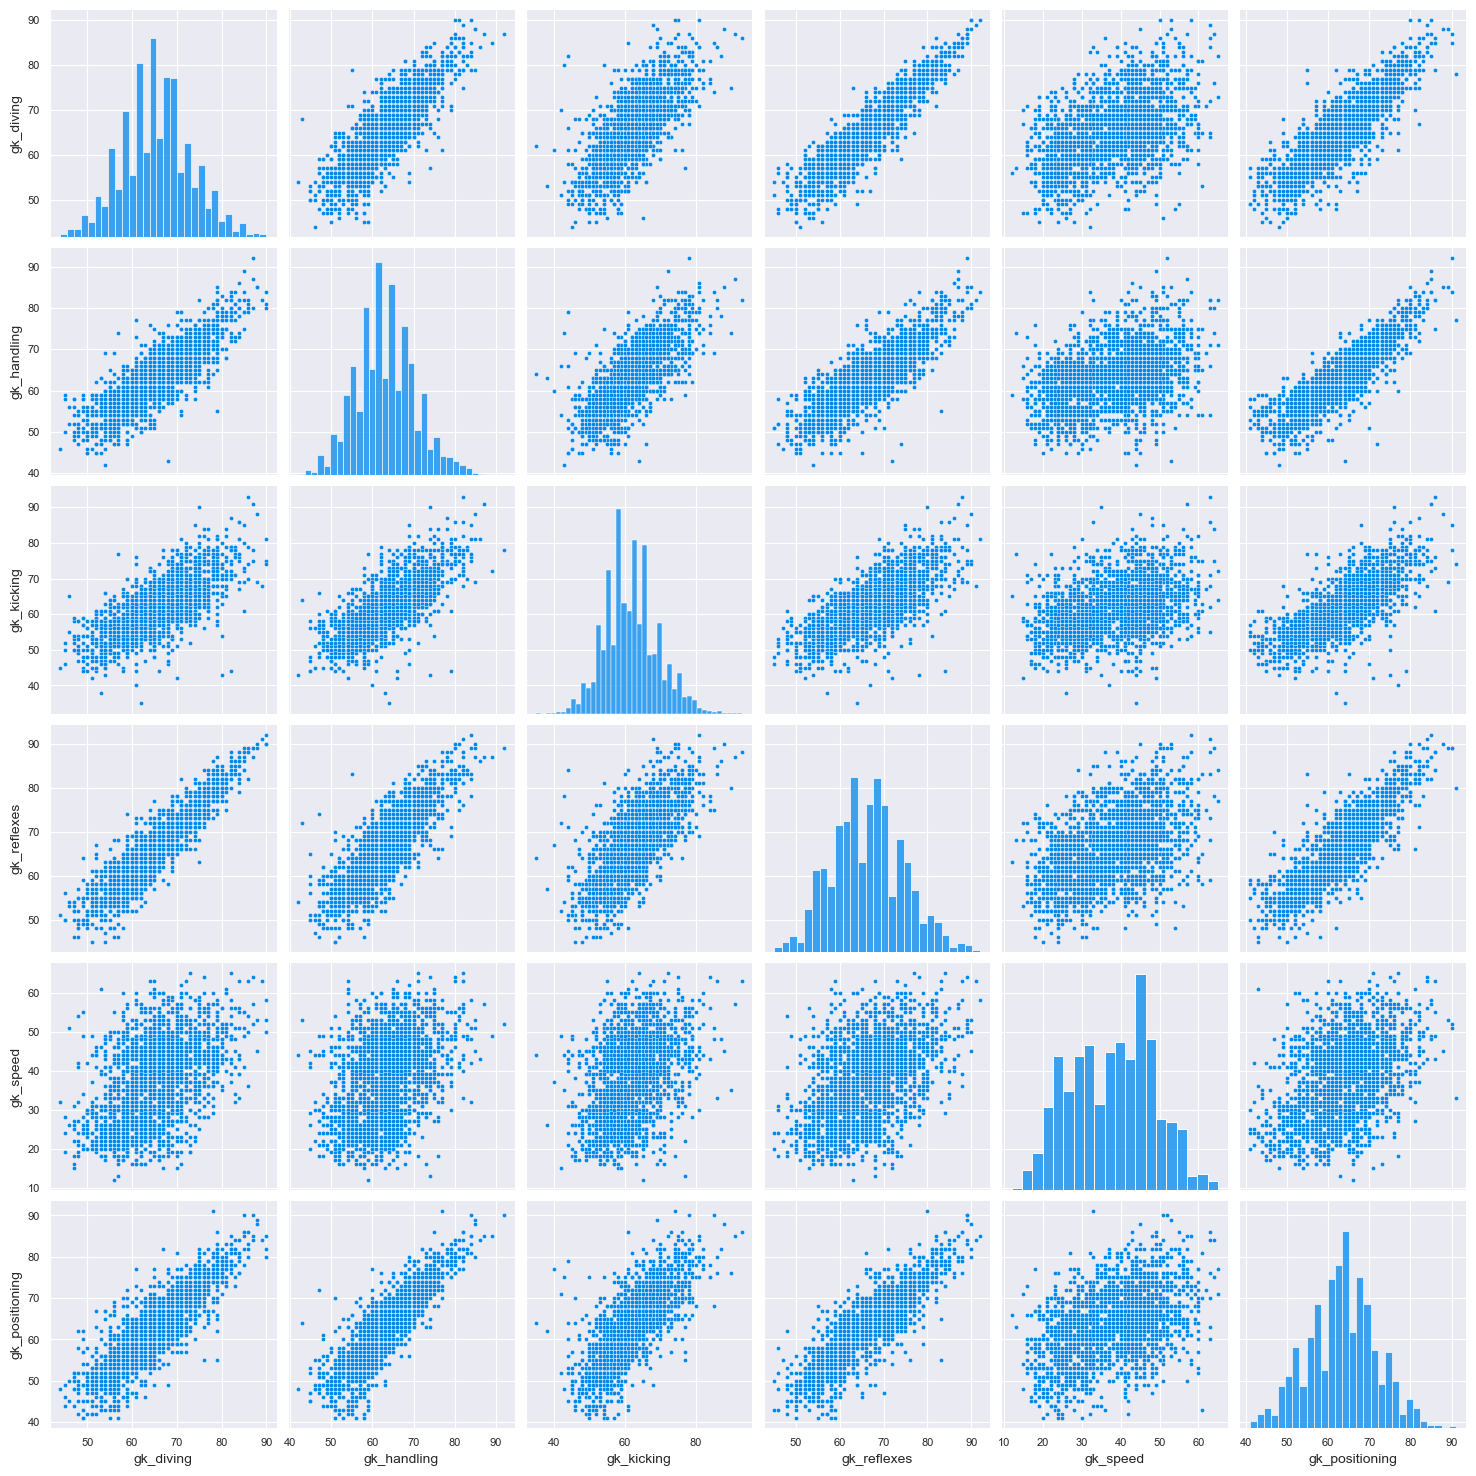

In [45]:
goalkeeper_attributes = ['gk_diving','gk_handling','gk_kicking','gk_reflexes','gk_speed','gk_positioning']
sns.pairplot(data[goalkeeper_attributes])
plt.show()

### Multivariate Analysis of Performance Attributes

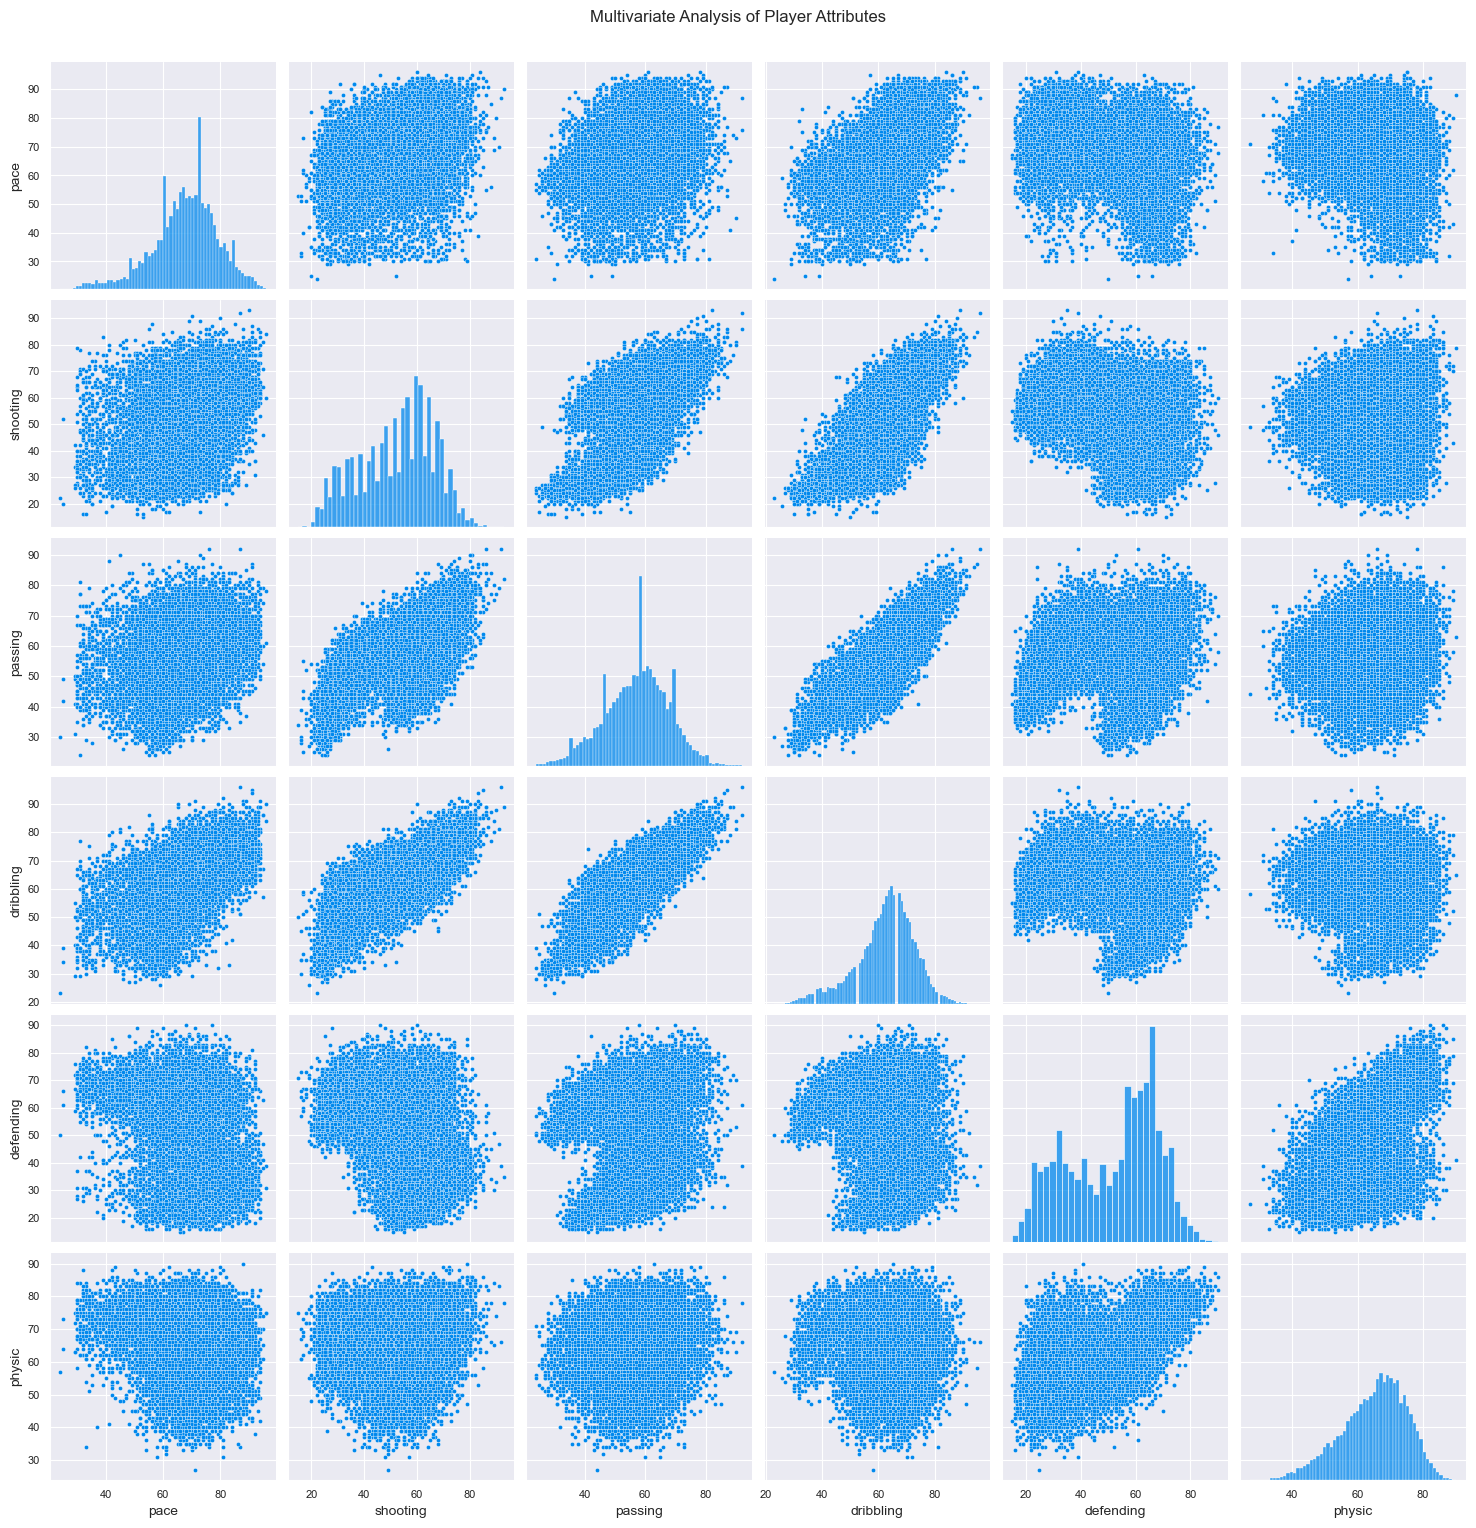

In [46]:
performance_attributes = ['pace','shooting','passing','dribbling','defending','physic']
numerical_df = data[performance_attributes]

sns.pairplot(numerical_df)
plt.suptitle('Multivariate Analysis of Player Attributes', y=1.02)
plt.show()

## Task3:- Explore the data and attempt all the below asked questions in a step by step manner


### 1. Prepare a rank ordered list of top 10 countries with most players. Which countries are producing the most footballers that play at this level?

### Top 10 Countries with Most Players

In [47]:
# Get the top 10 countries with the most players
top_10_countries = data['nationality'].value_counts().nlargest(10).reset_index()

# Rename columns 
top_10_countries.columns = ['Nationality', 'Player Count']

# Add a 'Rank' column
top_10_countries['Rank'] = range(1, 11)

print(top_10_countries)

   Nationality  Player Count  Rank
0      England          1667     1
1      Germany          1216     2
2        Spain          1035     3
3       France           984     4
4    Argentina           886     5
5       Brazil           824     6
6        Italy           732     7
7     Colombia           591     8
8        Japan           453     9
9  Netherlands           416    10


#### Observations:
- Countries with most players are: 1) England 2) Germany 3) Spain 4) France 5) Argentina 6) Brazil 7) Italy 8) Colombia 9) Japan 10) Netherlands

### 2. Plot the distribution of overall rating vs. age of players. Interpret what is the age after which a player stops improving?

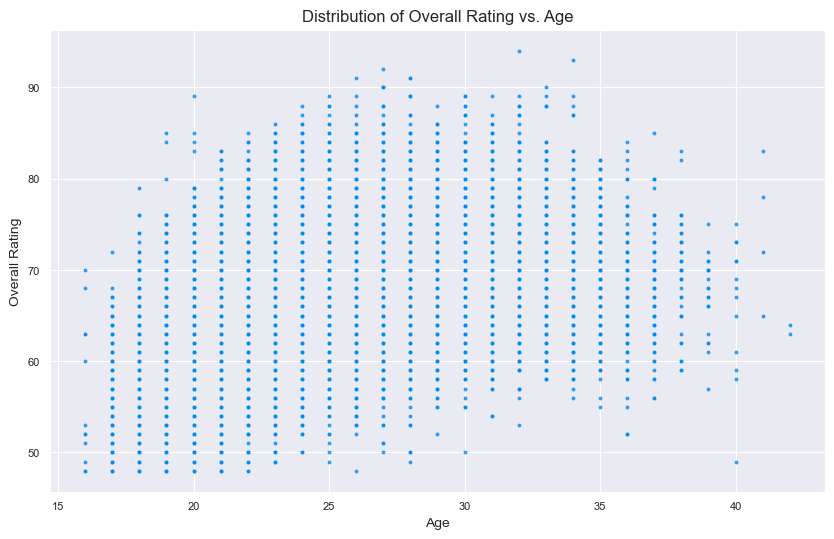

In [48]:
# Select the 'Age' and 'Overall' columns
age_overall_df = data[['age', 'overall']]

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age',y='overall',data=age_overall_df,alpha=0.8)
plt.title('Distribution of Overall Rating vs. Age')
plt.xlabel('Age')
plt.ylabel('Overall Rating')
plt.show()

##### Observations:
- Till the age of 26-27, there is a significant growth in players overall potential.
- From 27-28 till 40, players skills improve but the improvement is slow compared to the growth rate that was there 27 years.
- After 40, most of the players stop improving at this stage.

### 3) Which type of offensive players tend to get paid the most: the striker, the right-winger, or the left-winger?

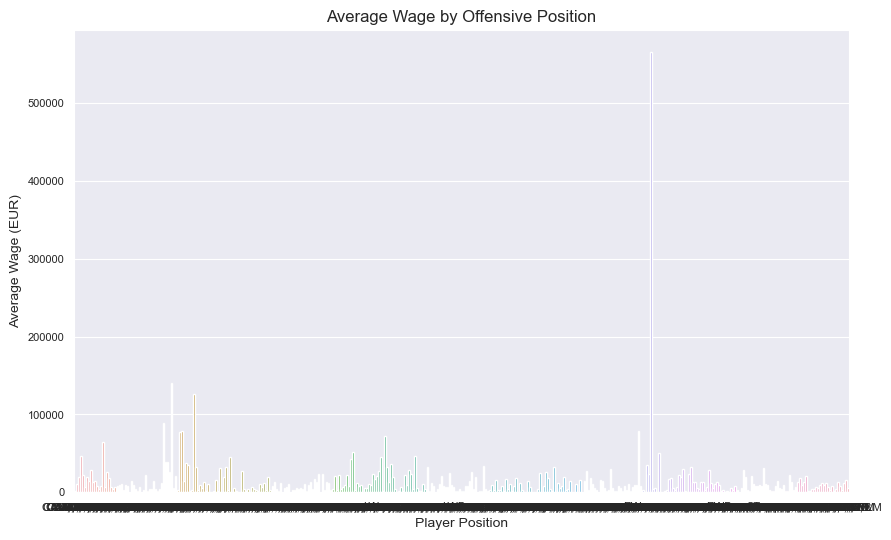

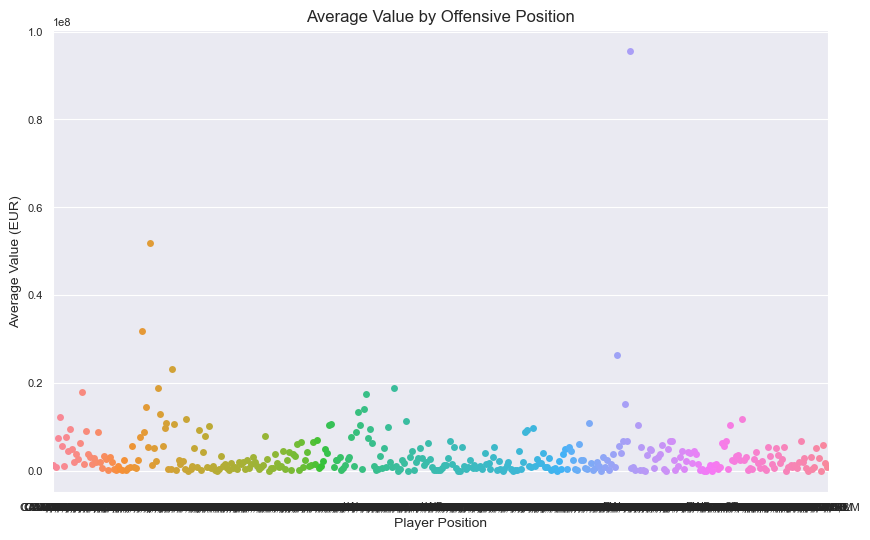

In [49]:
selected_columns = ['player_positions', 'wage_eur', 'value_eur']
offensive_players_df = data[selected_columns]

# Filter data for offensive positions (striker, right-winger, left-winger)
offensive_positions = ['ST', 'RW', 'LW']
filtered_offensive_df = offensive_players_df[offensive_players_df['player_positions'].str.contains('|'.join(offensive_positions))]

# Calculate average wage and value for each offensive position
average_salary_by_position = filtered_offensive_df.groupby('player_positions').mean()

# Plot bar chart to visualize the average wages
plt.figure(figsize=(10, 6))
sns.barplot(x=average_salary_by_position.index, y='wage_eur', data=average_salary_by_position)
plt.title('Average Wage by Offensive Position')
plt.xlabel('Player Position')
plt.ylabel('Average Wage (EUR)')
plt.show()

# Plot bar chart to visualize the average values
plt.figure(figsize=(10, 6))
sns.stripplot(x=average_salary_by_position.index, y='value_eur', data=average_salary_by_position)
plt.title('Average Value by Offensive Position')
plt.xlabel('Player Position')
plt.ylabel('Average Value (EUR)')
plt.show()